<a href="https://colab.research.google.com/github/Ishansingh438/OIBSIP/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OASIS INFOBYTE INTERNSHIP

## Task: 4
### Sales Prediction Using Python

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading csv file
df = pd.read_csv('/content/drive/MyDrive/Oasis Infobyte Internship/Advertising.csv')

### Understanding Dataset

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### Data Cleaning

In [6]:
# Drop column Unnamed: 0
df = df.drop("Unnamed: 0" ,axis=1)

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Data Analysis

In [8]:
# Checking null value
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
# Information about the dataset  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# checking for unique value
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [11]:
# Statistical summary  
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Data Visualization

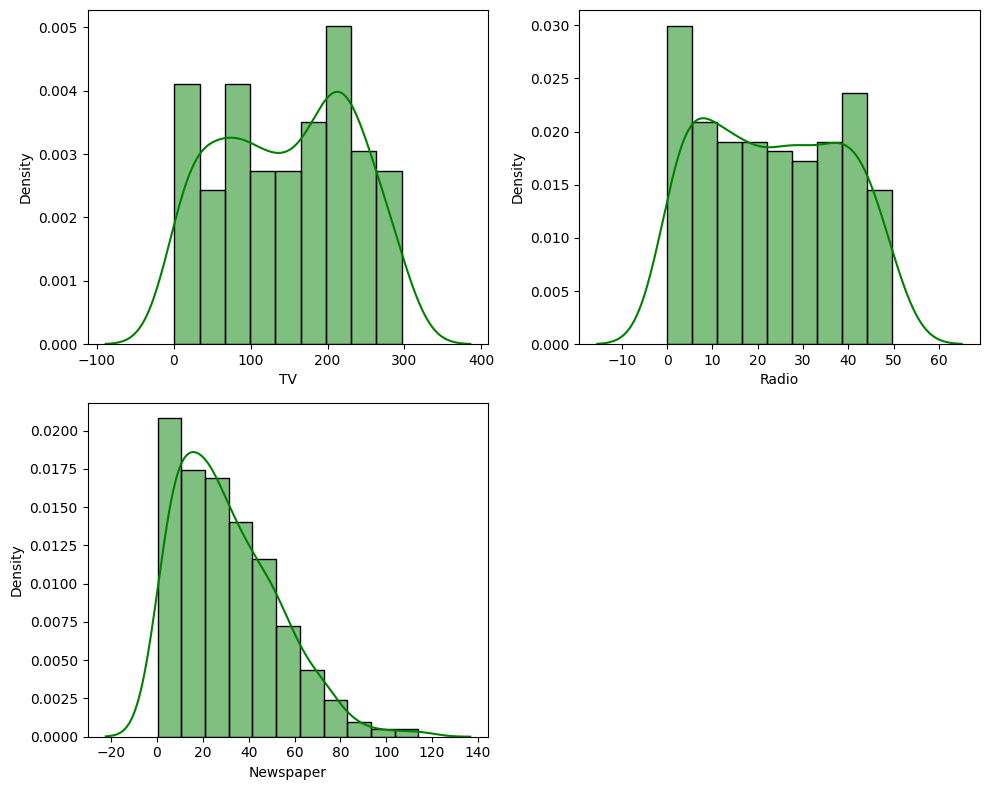

In [12]:
fig=plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.histplot(x=df['TV'], kde=True,
    stat="density", kde_kws=dict(cut=3),color='green')
plt.xlabel('TV')

plt.subplot(2,2,2)
sns.histplot(x=df['Radio'],kde=True,
    stat="density", kde_kws=dict(cut=3),color='green')
plt.xlabel('Radio')

plt.subplot(2,2,3)
sns.histplot(x=df['Newspaper'],kde=True,
    stat="density", kde_kws=dict(cut=3),color='green')
plt.xlabel('Newspaper')

plt.tight_layout()


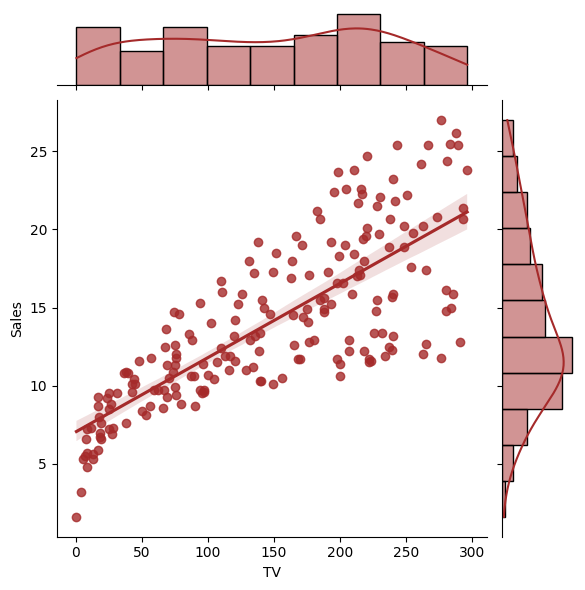

In [13]:
# create a joint plot
sns.jointplot(x='TV', y='Sales', data=df, kind='reg', color='brown')

# display the plot
plt.show()

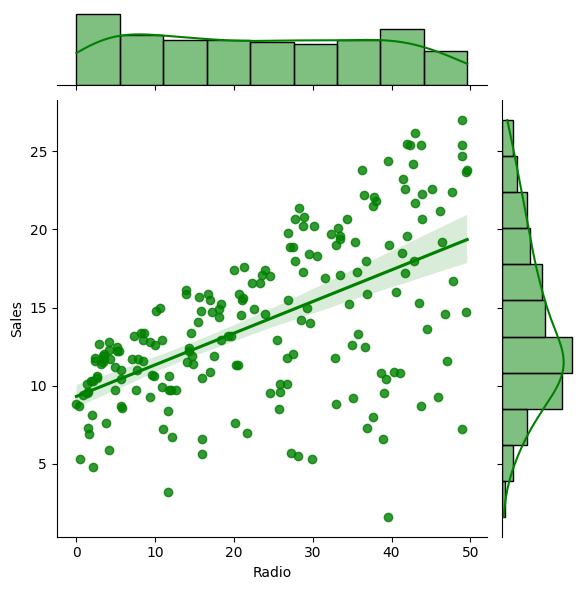

In [14]:
# create a joint plot
sns.jointplot(x='Radio', y='Sales', data=df, kind='reg', color='green')

# display the plot
plt.show()

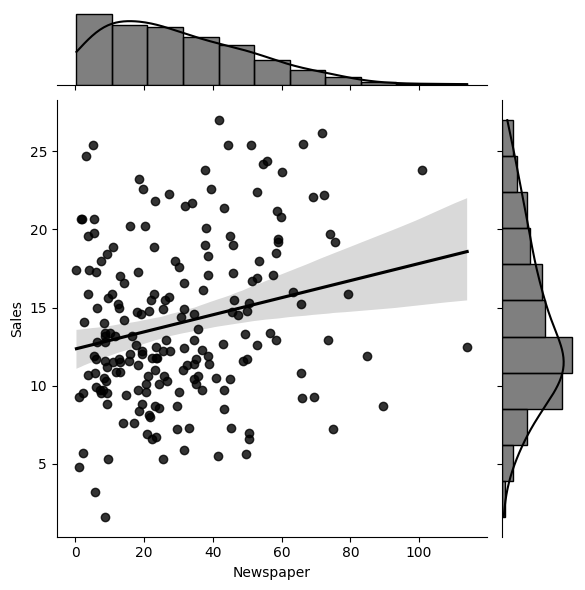

In [15]:
# create a joint plot
sns.jointplot(x='Newspaper', y='Sales', data=df, kind='reg', color='black')

# display the plot
plt.show()

<Axes: >

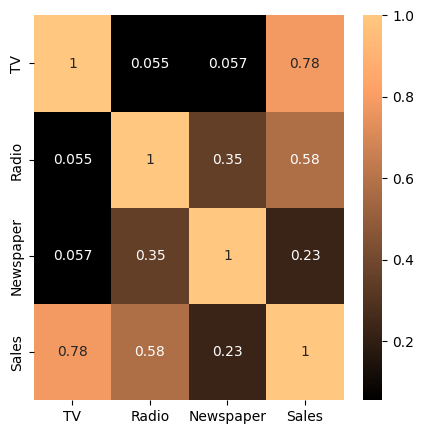

In [16]:
# Check for multi-collinearity
correlation = df.corr()
plt.figure(figsize = [5,5])
sns.heatmap(correlation, cmap = 'copper', annot = True)

## Training the Model

In [17]:
# Defining X and Y
predict = "Sales"
data = df[["TV","Radio","Newspaper","Sales"]]

In [18]:
X = np.array(data.drop([predict],1))
Y = np.array(data[predict])

In [19]:
# Spliting dataset into train and test 
X_train , X_test , Y_train ,Y_test = train_test_split(X , Y , test_size=0.3 , random_state=101)

In [20]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(200, 3)
(140, 3)
(60, 3)


In [21]:
model=XGBRegressor()
model.fit(X_train  , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [22]:
pred=model.predict(X_test)

In [23]:
#Checking accuracy
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
mae=mean_absolute_error(Y_test , pred)
mse=mean_squared_error(Y_test , pred)
r2=r2_score(Y_test , pred)

print("Mean absolute error: {}".format(mae))
print("Mean squared error: {}".format(mse))

print("r2 score: {}".format(r2))

Mean absolute error: 0.7224330361684163
Mean squared error: 0.7954132317069835
r2 score: 0.9718259912758572


## Implementing Predictive Model

In [25]:
tv=float(input("Cost of TV : "))
radio=float(input("Cost of Radio : "))
newspaper=float(input("Cost of newspaper : "))

arr=[tv , radio , newspaper]
arr=np.array(arr)
arr=arr.reshape(1 , -1)

result=model.predict(arr)
print("Sales : {}".format(result))

Cost of TV : 238
Cost of Radio : 25
Cost of newspaper : 60
Sales : [17.645168]
